<a id='Home'></a>
# Script de configuração de esquemáticos LTSpice 

Checkpoint:

1. [Generating Schematics](#Generating_Schematics)
2. [Running Schematics](#Running_Schematics)
3. [Getting Signals](#Getting_Signals)
4. [Plotting Power Signal](#Plotting_Power_Signal)

In [4]:
import os
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
simulation_dir = './'
schem_name = 'Abaixador_rv00.asc'

models = ['IRFH5207', 'SUP90N08-8m2P', 'FDB045AN08A0', 'IRF1407',  # Vds = 75.0V
          'PSMN5R560YS',  # Vds = 60.0V
          'Si4980DY',  # Vds = 80.0V
         ]

# currents = np.concatenate([np.arange(-70, -10, 30), np.arange(10, 70, 30)])
currents = np.concatenate([np.arange(-70, 0, 10), np.arange(10, 80, 10)])

In [6]:
currents

array([-70, -60, -50, -40, -30, -20, -10,  10,  20,  30,  40,  50,  60,
        70])

In [7]:
def clear_folder(folder):
    import shutil
    import os
    try:
        shutil.rmtree(folder)
    except (FileNotFoundError, PermissionError):
        pass

    os.makedirs(folder)

In [5]:
with open(simulation_dir+schem_name, 'r') as fasc:
    sch = fasc.read()
# print(sch)

Version 4
SHEET 1 880 824
WIRE -816 -816 -1280 -816
WIRE -736 -816 -816 -816
WIRE -816 -800 -816 -816
WIRE -976 -720 -1040 -720
WIRE -864 -720 -896 -720
WIRE -1040 -704 -1040 -720
WIRE -1280 -640 -1280 -816
WIRE -816 -640 -816 -704
WIRE -752 -640 -816 -640
WIRE -1040 -608 -1040 -624
WIRE -816 -608 -816 -640
WIRE -816 -608 -1040 -608
WIRE -816 -576 -816 -608
WIRE -640 -576 -816 -576
WIRE -416 -576 -560 -576
WIRE -816 -544 -816 -576
WIRE -976 -464 -1056 -464
WIRE -864 -464 -896 -464
WIRE -1056 -432 -1056 -464
WIRE -1280 -320 -1280 -560
WIRE -1056 -320 -1056 -352
WIRE -1056 -320 -1280 -320
WIRE -816 -320 -816 -448
WIRE -816 -320 -1056 -320
WIRE -416 -320 -416 -576
WIRE -416 -320 -816 -320
WIRE -1280 -288 -1280 -320
WIRE 0 0 0 0
FLAG -1280 -288 0
FLAG -736 -816 Vdd
FLAG -752 -640 Vmid
SYMBOL voltage -1280 -656 R0
WINDOW 123 0 0 Left 0
WINDOW 39 24 124 Left 2
SYMATTR SpiceLine Rser=0.001
SYMATTR InstName Vdc
SYMATTR Value 30
SYMBOL current -640 -576 R270
WINDOW 0 32 40 VTop 2
WINDOW 3 -32 4

<a id='Generating_Schematics'></a>
### Generating Schematics
[Home](#Home)

In [6]:
folder_schematics = './output/schematics_generated/'
clear_folder(folder_schematics)

dict_schematics = {}

for model in models:
    dict_schematics[model] = {}

    for current in currents:
        params = {'{Component1}': model,
                  '{Component2}': model,
                  '{current}': current}
        new_sch = sch
        for key, value in params.items():
            new_sch = new_sch.replace(key, str(value))

        new_filename = folder_schematics+simulation_dir+schem_name[:-4]+'_new_'+model+'_'+str(current)+'.asc'
        dict_schematics[model][current] = new_filename
        
        with open(new_filename, 'w') as fasc:
            print(new_sch, file=fasc)

with open('./output/dict_schematics.pkldict', 'wb') as fpkl:
    pickle.dump(dict_schematics, fpkl)

In [ ]:
folder_schematics = './output/schematics_generated/'
clear_folder(folder_schematics)

dict_schematics = {}

for model in models:
    dict_schematics[model] = {}

    for current in currents:
        params = {'{Component1}': model,
                  '{Component2}': model,
                  '{current}': current}
        new_sch = sch
        for key, value in params.items():
            new_sch = new_sch.replace(key, str(value))

        new_filename = (folder_schematics+simulation_dir+
                        schem_name[:-4]+'_new_'+model+'_'+
                        str(current)+'.asc')
        dict_schematics[model][current] = new_filename
        
        with open(new_filename, 'w') as fasc:
            print(new_sch, file=fasc)

with open('./output/dict_schematics.pkldict', 'wb') as fpkl:
    pickle.dump(dict_schematics, fpkl)

<a id='Running_Schematics'></a>
### Running Schematics
[Home](#Home)

In [7]:
successfully = {}
unsuccessfully = {}

for model, dict_currents in dict_schematics.items():
    successfully[model] = {}
    unsuccessfully[model] = {}
    for current, schematic in dict_currents.items ():
        command = f'"C:\\Program Files\\LTC\\LTspiceXVII\\XVIIx64.exe" -Run -b {schematic}'
        print('command:', command)
        
        return_system = os.system(command)
        print('return:', return_system, '\n\n')
        
        if return_system == 0:
            successfully[model][current] = schematic
        else:
            unsuccessfully[model][current] = schematic

command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-70.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-60.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-50.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-40.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-30.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-20.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_IRFH5207_-10.as

return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_PSMN5R560YS_-60.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_PSMN5R560YS_-50.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_PSMN5R560YS_-40.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_PSMN5R560YS_-30.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_PSMN5R560YS_-20.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Abaixador_rv00_new_PSMN5R560YS_-10.asc
return: 0 


command: "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -Run -b ./output/schematics_generated/./Aba

In [8]:
for model, dict_currents in successfully.items():
    for current, schematic in dict_currents.items():
        successfully[model][current] = schematic.replace('asc', 'raw')

In [9]:
import pickle
with open('./output/dict_raw.pkldict', 'wb') as fpkl:
    pickle.dump(successfully, fpkl)

<a id='Getting_Signals'></a>
### Getting the schematic signals
[Home](#Home)

In [10]:
import pickle
from ltspice.open_raw import ltspice
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
with open('./output/dict_raw.pkldict', 'rb') as fpkl:
    dict_raws = pickle.load(fpkl)

In [11]:
def clear_folder(folder):
    import shutil
    import os
    try:
        shutil.rmtree(folder)
    except FileNotFoundError:
        pass

    os.makedirs(folder)


# def filenameGen():
#     import uuid
#     return str(uuid.uuid4())

In [12]:
model, dict_currents = list(dict_raws.items())[0]
current, schematic = list(dict_currents.items())[0]
print(model, current)
l = ltspice.Ltspice(schematic)
l.parse()
l.getVariableNames()

IRFH5207 -70


['time',
 'V(vdd)',
 'V(vmid)',
 'V(n004)',
 'V(n002)',
 'V(n003)',
 'V(n001)',
 'Id(M1)',
 'Ig(M1)',
 'Is(M1)',
 'Id(M2)',
 'Ig(M2)',
 'Is(M2)',
 'I(I1)',
 'I(R1)',
 'I(R2)',
 'I(V1)',
 'I(V2)',
 'I(Vdc)']

In [13]:
folder_power_signal = r'./output/power_signal/'
clear_folder(folder_power_signal)

dict_power_signals = {}

for model, dict_currents in dict_raws.items():
    dict_power_signals[model] = {}
    for current, simulation in dict_currents.items():
        l = ltspice.Ltspice(simulation)
        l.parse()
        
        time = l.getTime() * pd.Timedelta(1, 's')
#         break
#     break
        
        columns = l.getVariableNames()
        
        df = pd.DataFrame(index=time, columns=columns) 
        
#         for column in columns:
#             df[column] = l.getData(column)

        V_z1 = l.getData('V(vdd)') - l.getData('V(vmid)')
        V_z2 = l.getData('V(vmid)')

        I_z1 = l.getData('Id(M1)')
        I_z2 = l.getData('Id(M2)')
        
        df['P_M1'] = V_z1 * I_z1
        df['P_M2'] = V_z2 * I_z2
        
        filename_df = folder_power_signal + f"ltspice_waves_{model}_{current}.pkl"
        dict_power_signals[model][current] = filename_df

        df.to_pickle(filename_df)

with open('./output/dict_power_signals.pkldict', 'wb') as fpkl:
     pickle.dump(dict_power_signals, fpkl)

<a id='Plotting_Power_Signal'></a>
### Plotting Power Signal
[Home](#Home)

In [9]:
def plotPowerCharts(df, title, limits=((None, None), (None, None))):
    P1 = df['P_M1']
    P2 = df['P_M2']
    
    (l1_min, l1_max), (l2_min, l2_max) = limits
    
    plt.subplot(211)
    plt.plot(df.index/pd.Timedelta(1, 's'), P1.values, label='P($S$)', color='red')
    ymin, ymax = P1.min(), P1.max()
    plt.vlines((l1_min, l1_max, l2_min, l2_max), ymin, ymax, color='black', linestyle='dashed')
    plt.fill_between((l1_min, l1_max), (ymin, ymin), (ymax, ymax), where=ymin <= ymax, facecolor='lightblue', interpolate=True)
    plt.fill_between((l2_min, l2_max), (ymin, ymin), (ymax, ymax), where=ymin <= ymax, facecolor='lightblue', interpolate=True)
    plt.xlim(4e-6, 11e-6)
    plt.legend()
    plt.title(title)
    
    plt.subplot(212)
    plt.plot(df.index/pd.Timedelta(1, 's'), P2.values, label='P($\overline{S}$)', color='red')
    ymin, ymax = P2.min(), P2.max()
    plt.vlines((l1_min, l1_max, l2_min, l2_max), ymin, ymax, color='black', linestyle='dashed')
    plt.fill_between((l1_min, l1_max), (ymin, ymin), (ymax, ymax), where=ymin <= ymax, facecolor='lightblue', interpolate=True)
    plt.fill_between((l2_min, l2_max), (ymin, ymin), (ymax, ymax), where=ymin <= ymax, facecolor='lightblue', interpolate=True)
    plt.xlim(4e-6, 11e-6)
    plt.legend()
    
    plt.tight_layout()

In [1]:
import pickle

with open('./output/dict_power_signals.pkldict', 'rb') as fpkl:
     dict_power_signals = pickle.load(fpkl)

In [2]:
# df = pd.read_pickle(dict_power_signals['IRFH5207'][-70])
# df['V(n003)'].plot(label='vPulse (S1)')
# plt.legend(loc=7, framealpha=0.3)
# plt.xticks(np.linspace(df.index[0], df.index[-1], 5))
# plt.show()

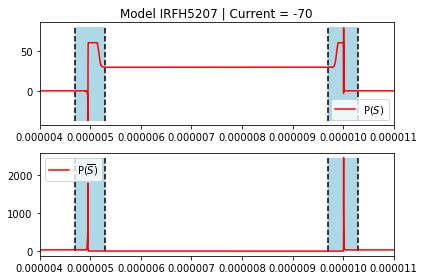

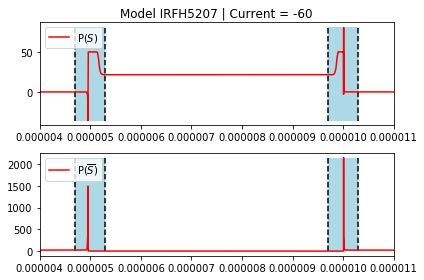

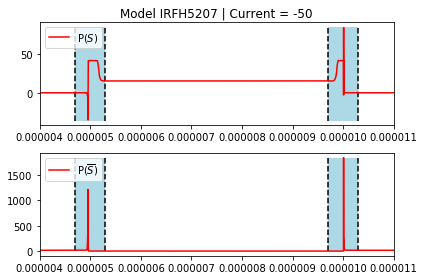

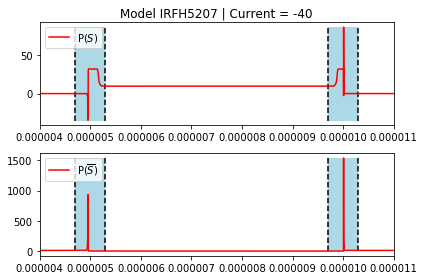

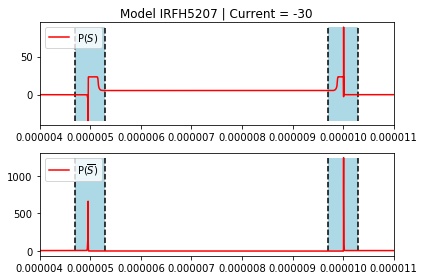

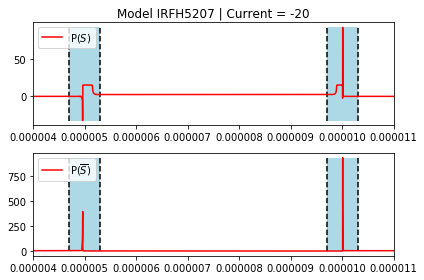

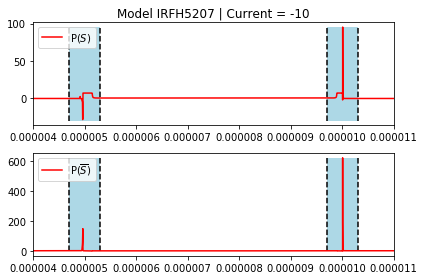

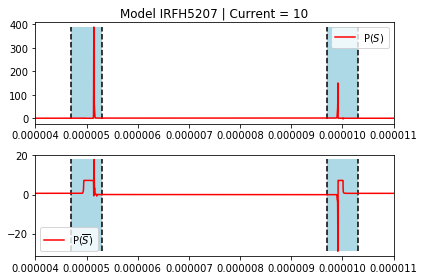

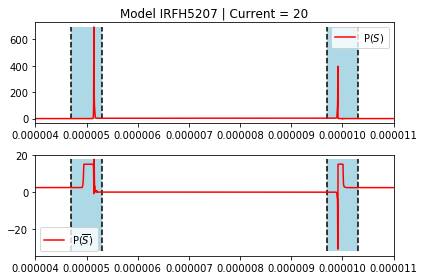

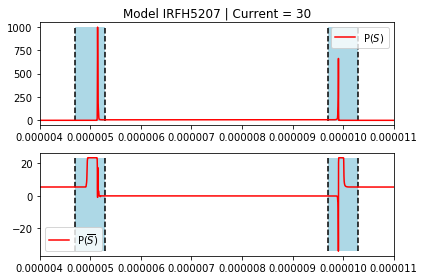

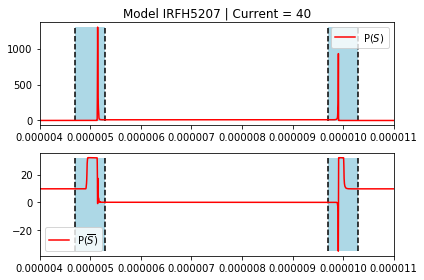

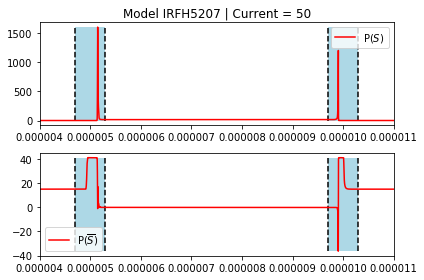

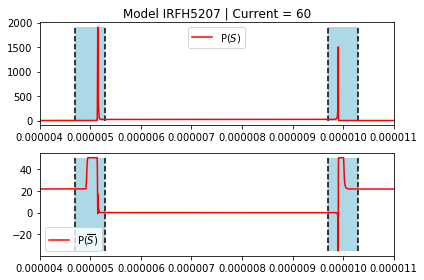

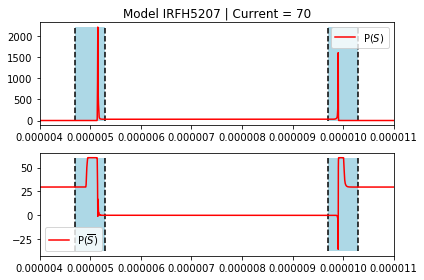

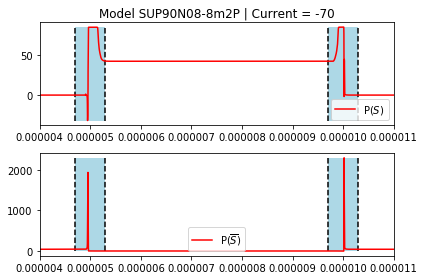

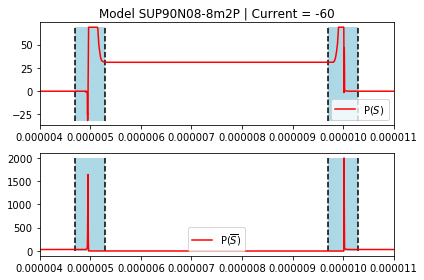

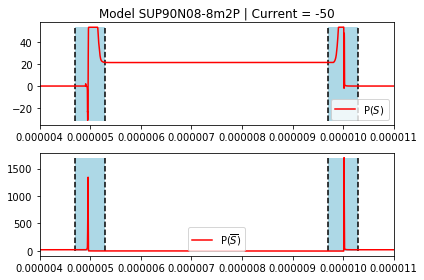

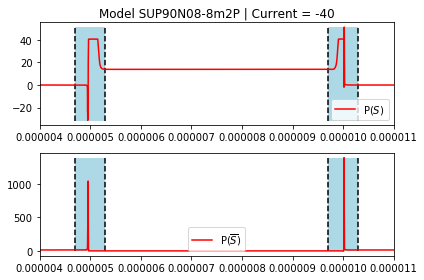

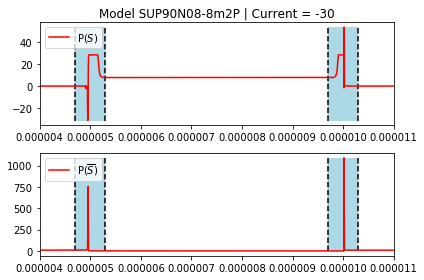

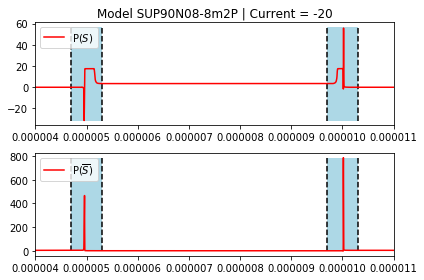

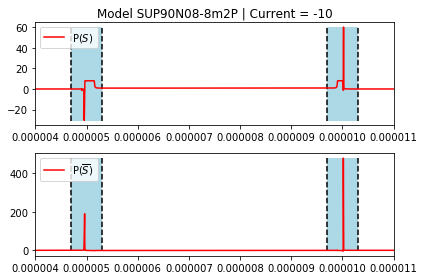

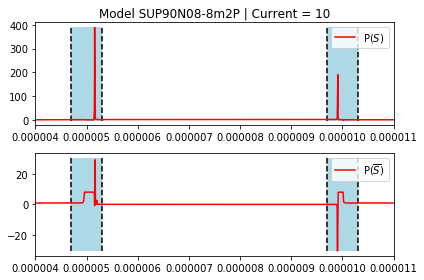

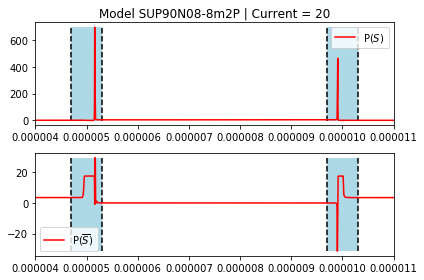

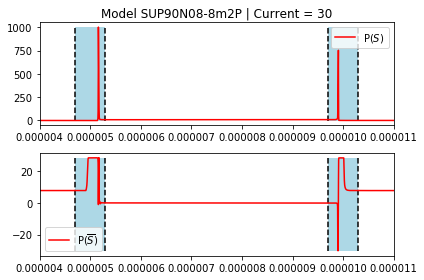

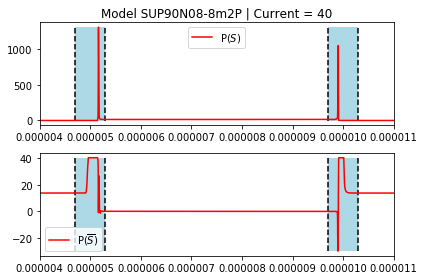

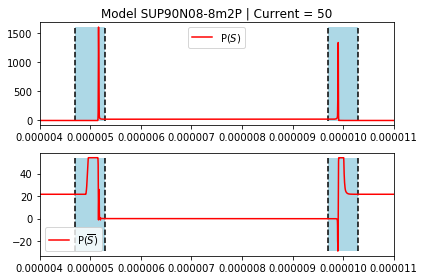

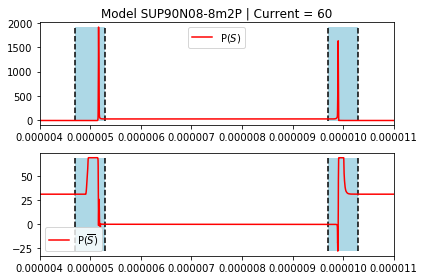

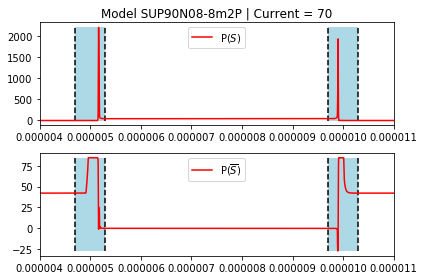

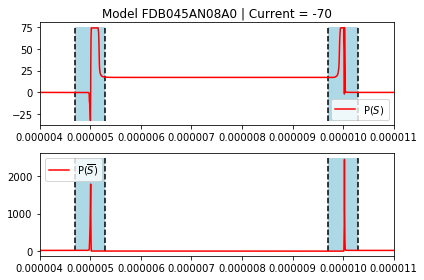

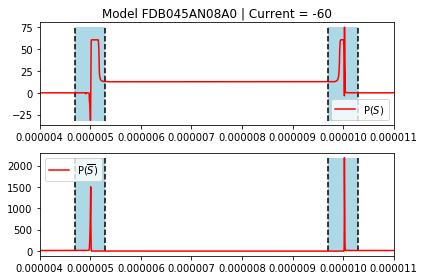

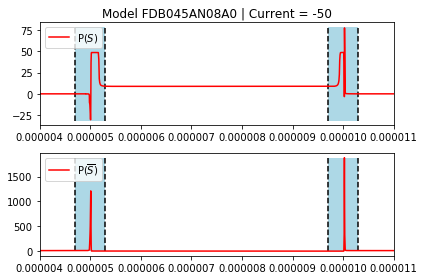

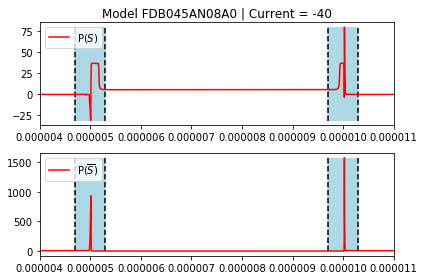

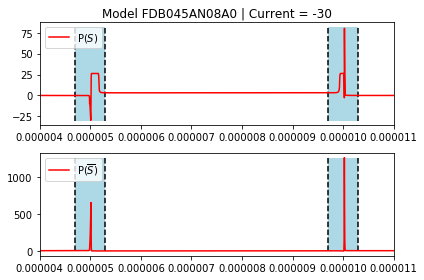

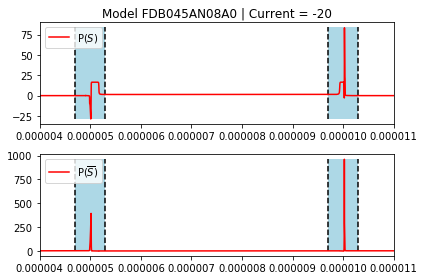

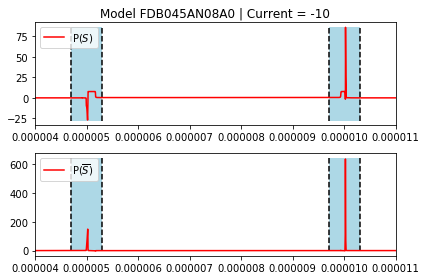

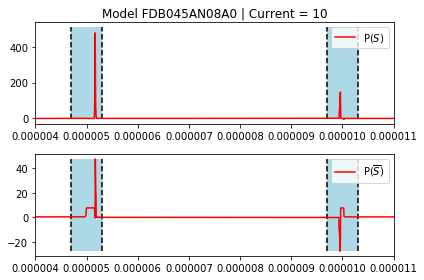

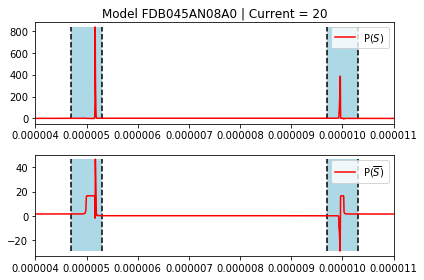

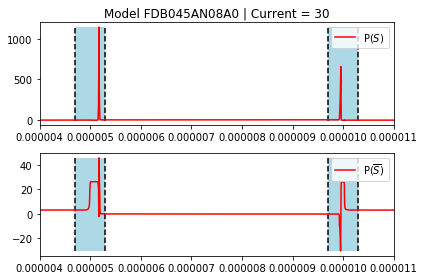

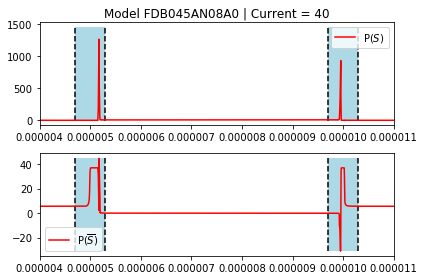

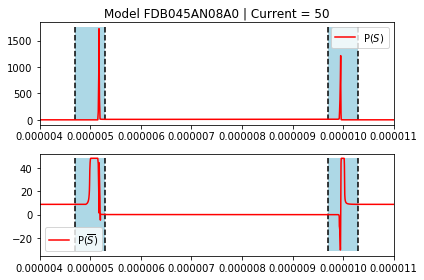

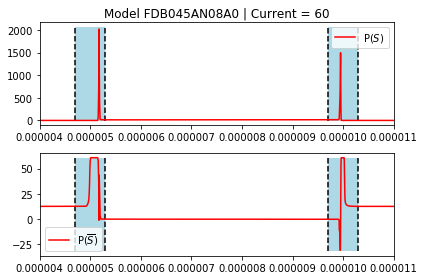

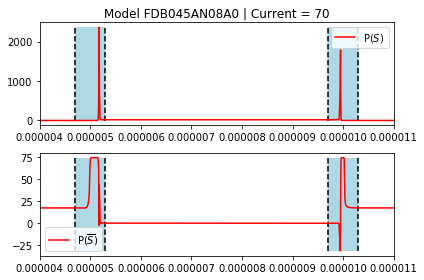

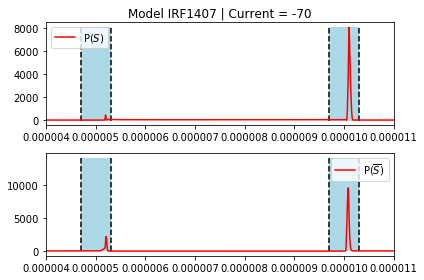

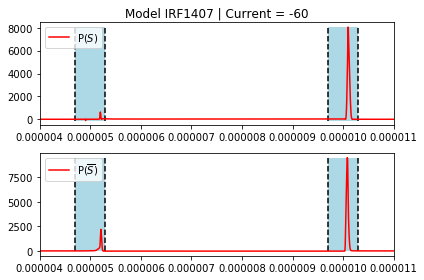

c:\users\tiarles\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
c:\users\tiarles\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
c:\users\tiarles\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
c:\users\tiarles\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


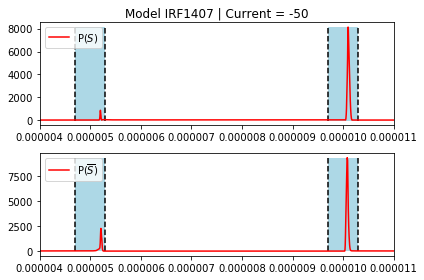

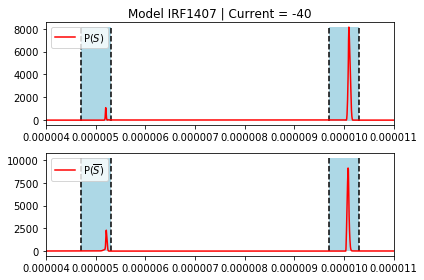

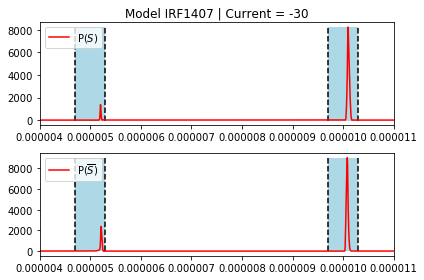

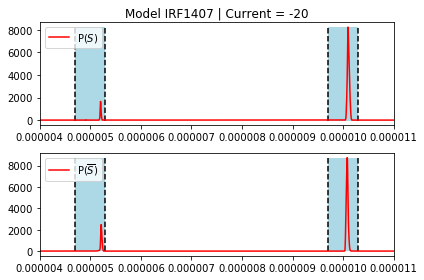

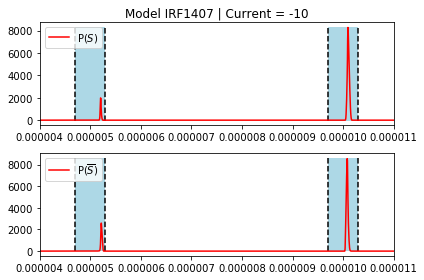

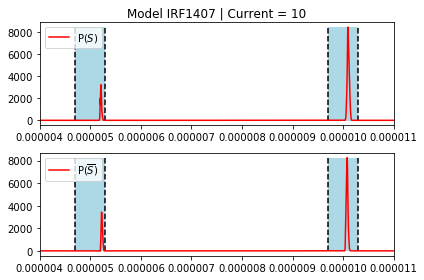

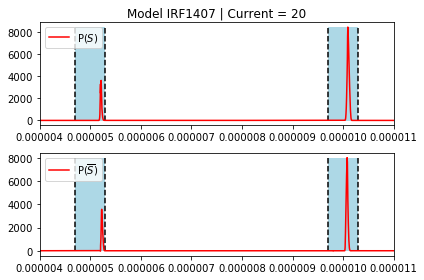

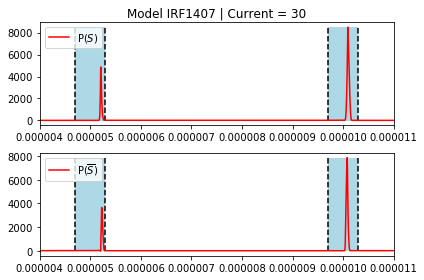

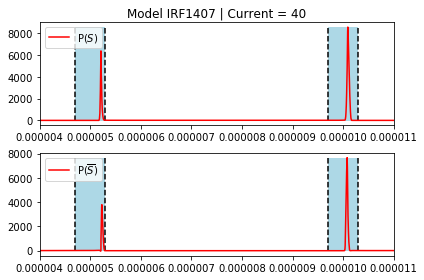

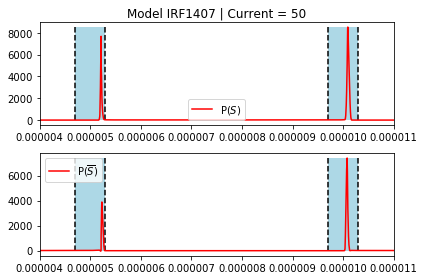

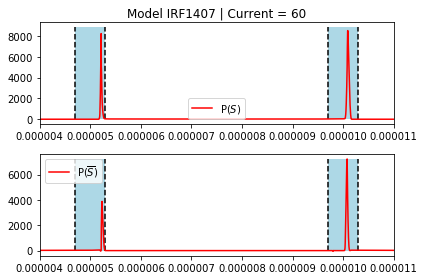

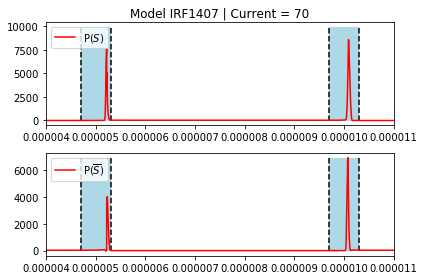

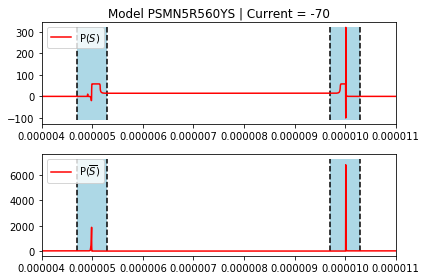

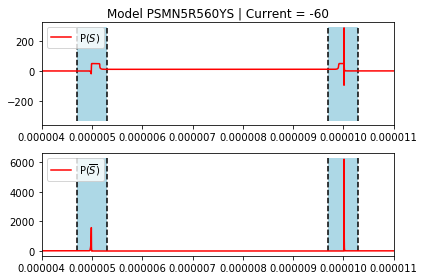

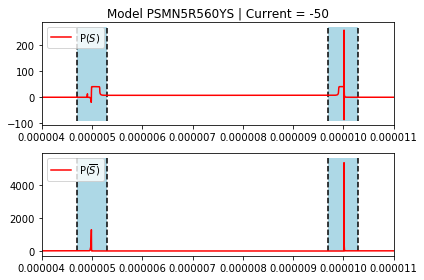

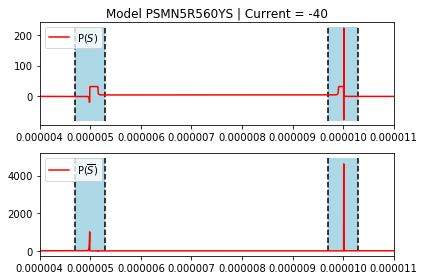

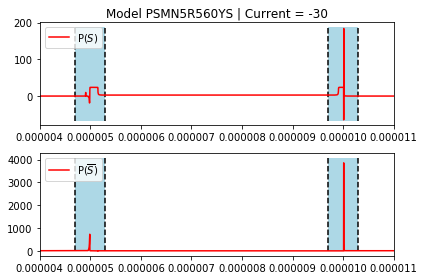

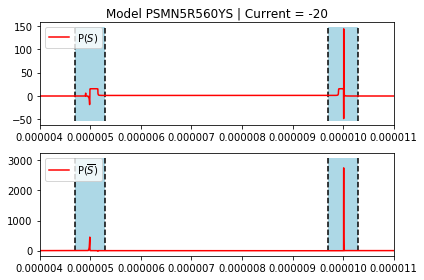

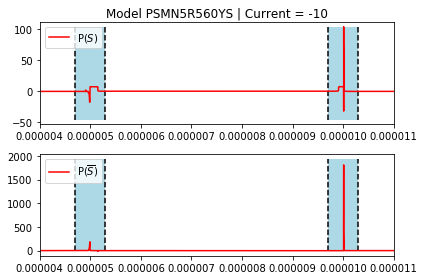

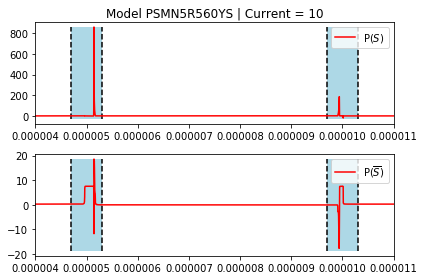

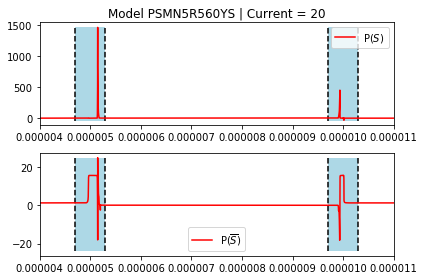

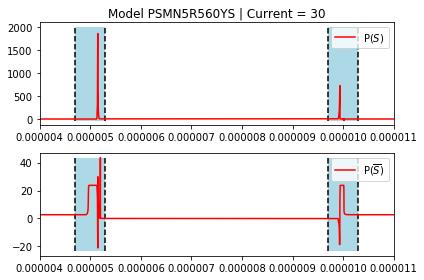

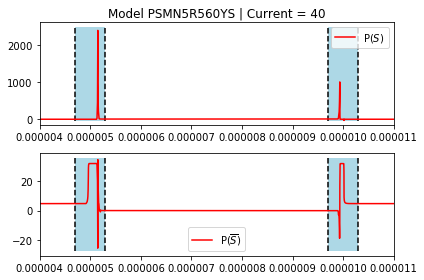

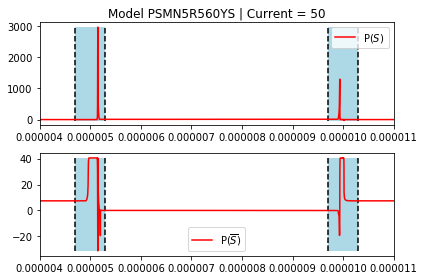

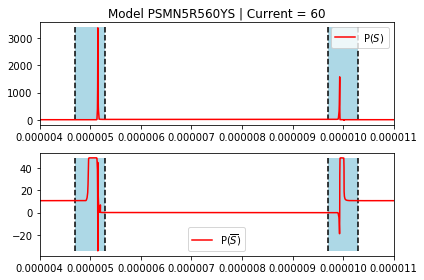

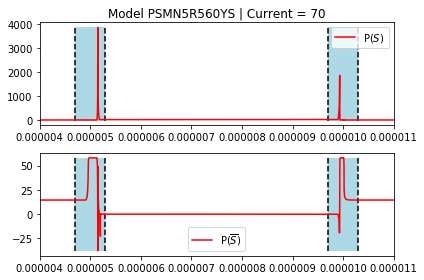

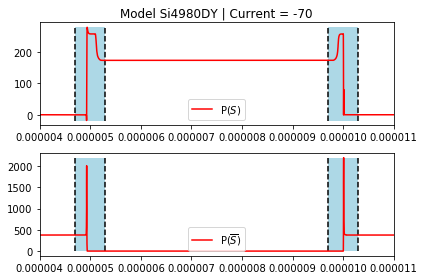

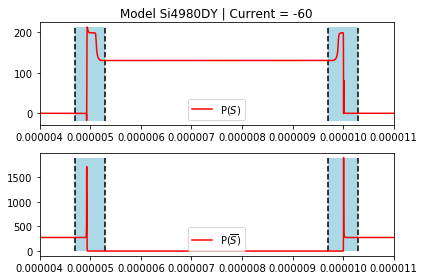

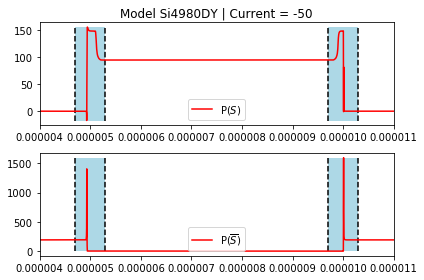

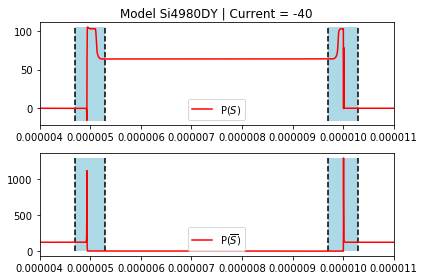

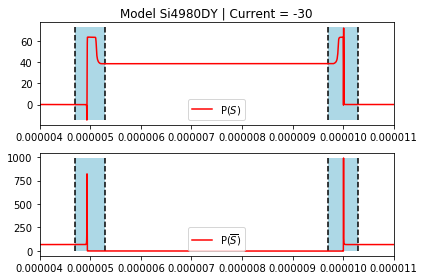

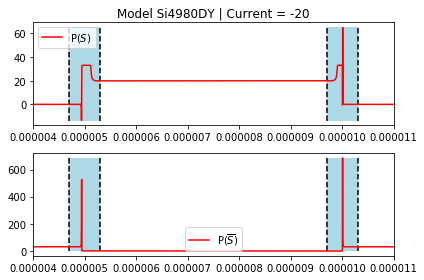

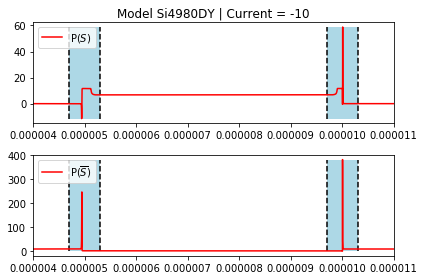

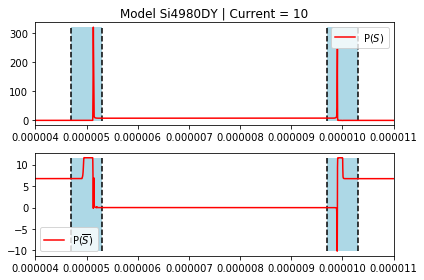

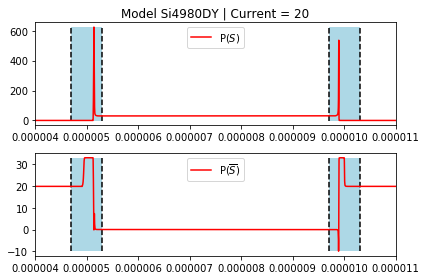

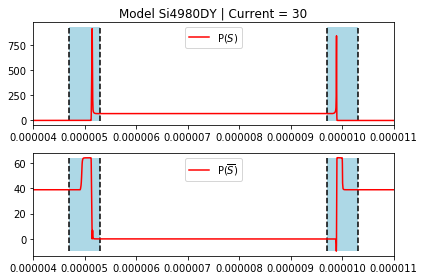

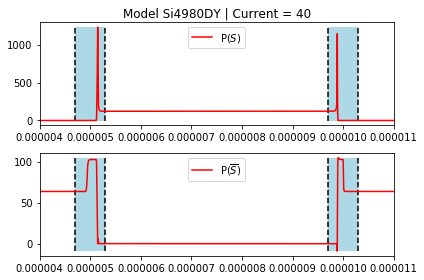

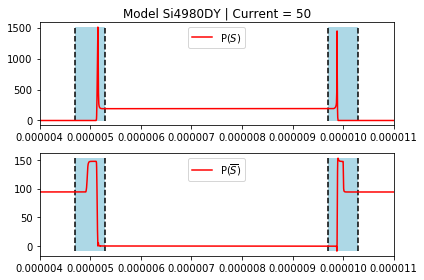

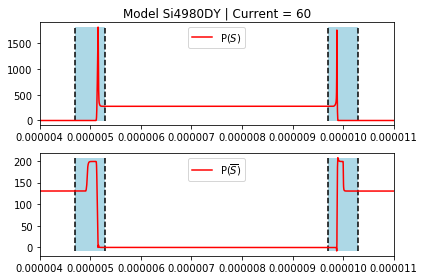

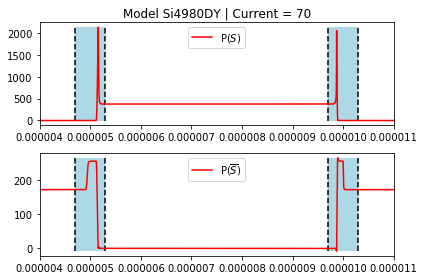

In [10]:
th = .3e-6

energy = {'eon': {},
          'eoff': {},
          'erec': {},
          'eDon': {}}
          

for model, dict_currents in dict_power_signals.items():
    energy['eon'][model] = {}
    energy['eoff'][model] = {}
    energy['erec'][model] = {}
    energy['eDon'][model] = {}
    for current, simulation in dict_currents.items():
        df = pd.read_pickle(simulation)
        
        l_min_ON, l_max_ON = 5e-6-th, 5e-6+th
        l_min_OFF, l_max_OFF = 10e-6-th, 10e-6+th
        
        title = f"Model {model} | Current = {current}"
        
        plotPowerCharts(df, title, ((l_min_ON, l_max_ON), (l_min_OFF, l_max_OFF)))
        plt.savefig(f'{model}.pdf')
        plt.show()
        
        # limits definition
        l_min_ON, l_max_ON = (5e-6-th) * pd.Timedelta(1, 's'), (5e-6+th) * pd.Timedelta(1, 's')
        l_min_OFF, l_max_OFF = (10e-6-th) * pd.Timedelta(1, 's'), (10e-6+th) * pd.Timedelta(1, 's')
        # slicing
        df_ON = df.loc[l_min_ON: l_max_ON, ['P_M1','P_M2']]
        df_OFF = df.loc[l_min_OFF: l_max_OFF, ['P_M1','P_M2']]
        
        # Area Calculation and keep the value
        
        if current > 0:
            # First Comutation ON S1 and OFF S2
            # Second Comutation OFF S1 and ON S2
            
            energy['eon'][model][current] = np.trapz(df_ON['P_M1'].values, df_ON.index/pd.Timedelta(1, 's'))
            energy['erec'][model][current] = np.trapz(df_ON['P_M2'].values, df_ON.index/pd.Timedelta(1, 's'))
            
            energy['eoff'][model][current] = np.trapz(df_OFF['P_M1'].values, df_OFF.index/pd.Timedelta(1, 's'))
            energy['eDon'][model][current] = np.trapz(df_OFF['P_M2'].values, df_OFF.index/pd.Timedelta(1, 's'))
        else:
            energy['eon'][model][current] = np.trapz(df_OFF['P_M1'].values, df_OFF.index/pd.Timedelta(1, 's'))
            energy['erec'][model][current] = np.trapz(df_OFF['P_M2'].values, df_OFF.index/pd.Timedelta(1, 's'))
            
            energy['eoff'][model][current] = np.trapz(df_ON['P_M1'].values, df_ON.index/pd.Timedelta(1, 's'))
            energy['eDon'][model][current] = np.trapz(df_ON['P_M2'].values, df_ON.index/pd.Timedelta(1, 's'))

In [11]:
energy_processed = {}
for etype, dict_models in energy.items():
    energy_processed[etype] = {}
    for model, dict_currents in dict_models.items():
        energy_processed[etype][model] = {}
        for current, power_value in dict_currents.items():
            abs_current = np.abs(current)
            try:
                energy_processed[etype][model][abs_current] += power_value
            except KeyError:
                energy_processed[etype][model][abs_current] = power_value

In [12]:
# energy_processed

In [13]:
# energy_processed

In [14]:
current2 = np.arange(10, 80, 10)

energy_processed2 = {}
for etype, dict_models in energy_processed.items():
    energy_processed2[etype] = {}
    for model, dict_currents in dict_models.items():
        tmp_array = []
        
        for c in current2:
            tmp_array.append(dict_currents[c])
        energy_processed2[etype][model] = tmp_array

In [15]:
energy_processed3 = {}
for etype, dict_models in energy_processed2.items():
    for model, power_values in dict_models.items():
        try:
            energy_processed3[model][etype] = np.poly1d(np.polyfit(current2, power_values, 3))
        except KeyError:
            energy_processed3[model] = {}
            energy_processed3[model][etype] = np.poly1d(np.polyfit(current2, power_values, 3))

In [23]:
import pickle
folder_name = r'C:\Users\Tiarles\Documents\Mestrado\notebooks_modulacao\4 Comparação entre modelos de transistor e modulações/'
tipo = 'MOSFET'
for model, curves in energy_processed3.items():
    curves['name'] = model
    curves['type'] = tipo
    
    with open(folder_name+model+'.pklmod', 'wb') as fpkl:
        pickle.dump(curves, fpkl)
#     print(folder_name+model+'.pklmod', '\n\n')
#     print(curves, '\n\n')

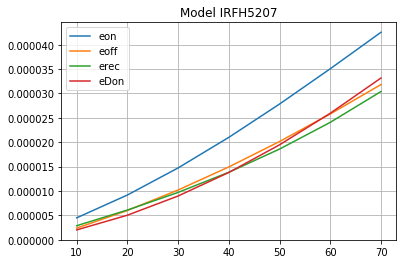

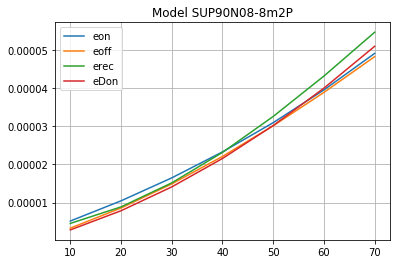

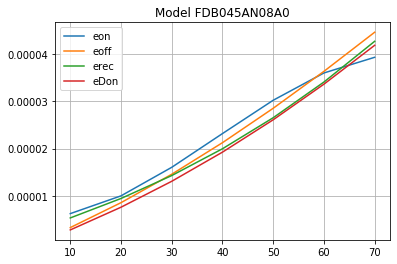

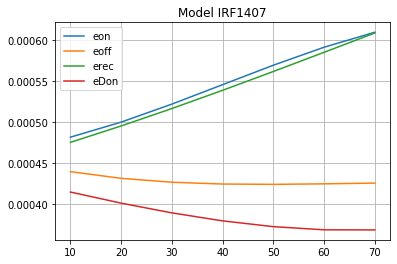

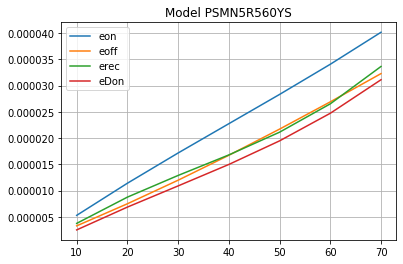

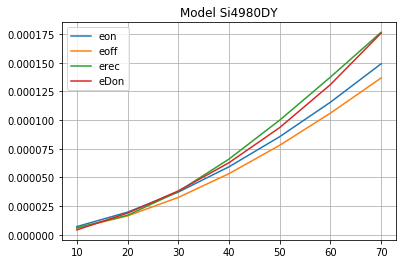

In [39]:
for model, curves in energy_processed3.items():
    plt.title(f'Model {model}')
    for etype, curve in curves.items():
        plt.plot(current2, curve(current2), label=etype)
    plt.grid()
    plt.legend()
    plt.show()